In [3]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

/home/panshop/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


169017344/169001437 [==============================] - 119s 1us/step


In [11]:
y_train[0]

array([19])

In [5]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

keyboard


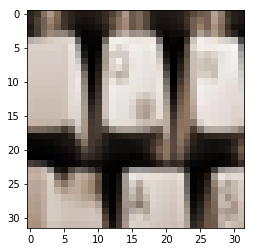

In [19]:
import matplotlib.pyplot as plt
i = 15
print(CIFAR100_LABELS_LIST[y_train[i][0]])
plt.imshow(x_train[i])
plt.show()

In [35]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)

## Normal trainig

In [71]:
x_train = x_train/255.0
x_test = x_test/255.0

In [163]:
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D
from keras.layers import LeakyReLU


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 4096)              0         
__________

In [158]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, nb_epoch=12, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 79s 2ms/step - loss: 3.8680 - acc: 0.1157 - val_loss: 3.3943 - val_acc: 0.1993
Epoch 2/12
50000/50000 [==============================] - 79s 2ms/step - loss: 3.1017 - acc: 0.2508 - val_loss: 2.8558 - val_acc: 0.3069
Epoch 3/12
50000/50000 [==============================] - 80s 2ms/step - loss: 2.6545 - acc: 0.3354 - val_loss: 2.5178 - val_acc: 0.3670
Epoch 4/12
50000/50000 [==============================] - 81s 2ms/step - loss: 2.3180 - acc: 0.4059 - val_loss: 2.3428 - val_acc: 0.3977
Epoch 5/12
50000/50000 [==============================] - 78s 2ms/step - loss: 2.0338 - acc: 0.4671 - val_loss: 2.2577 - val_acc: 0.4240
Epoch 6/12
50000/50000 [==============================] - 75s 2ms/step - loss: 1.7725 - acc: 0.5245 - val_loss: 2.2118 - val_acc: 0.4358
Epoch 7/12
50000/50000 [==============================] - 84s 2ms/step - loss: 1.5309 - acc: 0.5839 - val_loss: 2.2705 - val_acc

In [164]:
optimizer_ = SGD(lr=0.1,momentum=0.9,decay=1e-6) #probar con lr =0.1 sino gg
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, nb_epoch=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 69s 1ms/step - loss: 4.6036 - acc: 0.0112 - val_loss: 4.6067 - val_acc: 0.0100
Epoch 2/15
50000/50000 [==============================] - 67s 1ms/step - loss: 4.6080 - acc: 0.0091 - val_loss: 4.6064 - val_acc: 0.0100
Epoch 3/15
50000/50000 [==============================] - 67s 1ms/step - loss: 4.6080 - acc: 0.0092 - val_loss: 4.6060 - val_acc: 0.0100
Epoch 4/15
50000/50000 [==============================] - 67s 1ms/step - loss: 4.6079 - acc: 0.0090 - val_loss: 4.6060 - val_acc: 0.0100
Epoch 5/15
50000/50000 [==============================] - 67s 1ms/step - loss: 4.6077 - acc: 0.0094 - val_loss: 4.6064 - val_acc: 0.0100
Epoch 6/15
50000/50000 [==============================] - 67s 1ms/step - loss: 4.6078 - acc: 0.0095 - val_loss: 4.6060 - val_acc: 0.0100
Epoch 7/15
13952/50000 [=======>......................] - ETA: 45s - loss: 4.6074 - acc: 0.0097

KeyboardInterrupt: 

In [161]:
optimizer_ = SGD(lr=0.1,momentum=0.9,decay=1e-6) #probar con lr =0.1 sino gg
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, nb_epoch=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 76s 2ms/step - loss: 4.2933 - acc: 0.0501 - val_loss: 3.8551 - val_acc: 0.1128
Epoch 2/15
50000/50000 [==============================] - 71s 1ms/step - loss: 3.7611 - acc: 0.1285 - val_loss: 3.4727 - val_acc: 0.1789
Epoch 3/15
50000/50000 [==============================] - 67s 1ms/step - loss: 3.4237 - acc: 0.1857 - val_loss: 3.1681 - val_acc: 0.2415
Epoch 4/15
50000/50000 [==============================] - 67s 1ms/step - loss: 3.1165 - acc: 0.2427 - val_loss: 2.9325 - val_acc: 0.2881
Epoch 5/15
50000/50000 [==============================] - 68s 1ms/step - loss: 2.8586 - acc: 0.2926 - val_loss: 2.7199 - val_acc: 0.3261
Epoch 6/15
50000/50000 [==============================] - 68s 1ms/step - loss: 2.6208 - acc: 0.3389 - val_loss: 2.5820 - val_acc: 0.3585
Epoch 7/15
50000/50000 [==============================] - 71s 1ms/step - loss: 2.3987 - acc: 0.3840 - val_loss: 2.5011 - val_acc

In [162]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.4068)


In [ ]:
#donde dropout?

## autoencoder pre training

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#modify for th dim ordering

input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

## Transfer learning pre training

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten,Dropout
from keras.optimizers import SGD
from keras.applications import VGG16

#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)

In [29]:
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [40]:
features_test = modelVGG.predict(x_test)

In [49]:
from keras.layers import BatchNormalization
#https://keras.io/layers/normalization/

In [56]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

optimizer_ = SGD(lr=0.01,momentum=0.9,decay=1e-6)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,nb_epoch=20, batch_size=128,verbose=1,validation_data=(features_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 512)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              525312    
_________________________________________________________________
batch_normalization_12 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               102500    
Total params: 633,956
Trainable params: 630,884
Non-trainable params: 3,072
_________________________________________________________________


In [57]:
score = model.evaluate(features_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.3852)


### fine tunning the last layers of vgg?

In [152]:
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )

salida_vgg = modelVGG.get_layer('block4_pool').output_shape

model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

#delete last 4 layers of VGG16 and transfer the weight to new model
modelVGG.layers.pop() #delete last maxpooling
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop()
    model.layers[i].set_weights(last.get_weights())
    
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 2, 2, 512)         2359808   
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 2, 2, 512)         2359808   
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 2, 2, 512)         2359808   
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 512)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dense_68 (Dense)             (None, 1024)              525312    
__________

In [153]:
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)

In [155]:
features_train.shape

(50000, 2, 2, 512)

In [154]:
optimizer_ = SGD(lr=0.01,momentum=0.9,decay=1e-6)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,nb_epoch=20, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 71s 1ms/step - loss: 3.5162 - acc: 0.2141 - val_loss: 4.5538 - val_acc: 0.1687
Epoch 2/20
50000/50000 [==============================] - 68s 1ms/step - loss: 2.7403 - acc: 0.3285 - val_loss: 3.3330 - val_acc: 0.2599
Epoch 3/20
50000/50000 [==============================] - 70s 1ms/step - loss: 2.4660 - acc: 0.3810 - val_loss: 3.0097 - val_acc: 0.3091
Epoch 4/20
50000/50000 [==============================] - 69s 1ms/step - loss: 2.3159 - acc: 0.4078 - val_loss: 2.3625 - val_acc: 0.3901
Epoch 5/20
50000/50000 [==============================] - 68s 1ms/step - loss: 2.1864 - acc: 0.4350 - val_loss: 2.6770 - val_acc: 0.3600
Epoch 6/20
50000/50000 [==============================] - 69s 1ms/step - loss: 2.0560 - acc: 0.4586 - val_loss: 2.2441 - val_acc: 0.4212
Epoch 7/20
50000/50000 [==============================] - 70s 1ms/step - loss: 1.9507 - acc: 0.4754 - val_loss: 2.6159 - val_acc

In [156]:
score = model.evaluate(features_test, y_test,verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.4643)
